In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

0.7282510278578798 0.004253770452038452
45.65763049929353 125.84782196618289
-41.427671794169584 125.40025292649119
-73.61474495790976 24.173134853057775
-3.7593756469673423 -139.57225066257877
66.85181481556376 -76.94711774023521
-57.87818797754292 0.74416792464271
-88.30476380193011 -29.88842339118571
-32.15196877628415 80.03285208874883
-16.868816810404894 123.48353421080475
59.43886472067493 -125.882020678011
-32.03428428793444 -96.37900036495029
50.8445566162751 141.6911226753105
0.5417830818582843 -135.97745950805913
14.843991214446746 -152.14931659512447
8.188842100544122 11.92758127422502
-59.81325361297108 -86.61822533955296
13.694843996893795 -88.72505258324684
-67.78856697893879 -115.89430357235803
85.79778178387403 -2.232647904215952
29.103293744981997 136.60720726915855
35.159660377850685 84.38464153937554
-10.605188835385974 -70.92954946169195
-57.51095997438017 2.352405615536952
-18.48874222997206 106.49217694611434
-57.52485813731124 -57.96588825665131
51.20587086395343

2.362882384060029 -79.77095739409322
-65.68062224767168 -31.965523012429344
-72.26872816712233 12.442378353771716
-71.17031099102839 -24.664795505569884
-50.08423172114133 -143.06963458840102
35.89783930331767 134.41734407502588
84.43860409595376 161.34413206176606
10.405447047646618 -171.8605442901515
9.19149464875278 -139.47609033249236
6.66313172179936 144.5843984970765
-32.56007241356484 95.42378749884261
-17.41583803167913 81.7691918564197
56.467848735109555 135.9481612827605
-89.68548341338781 107.91241073300989
71.08674905113298 -144.87690767398988
-67.52843604120585 3.589730068297854
64.55358947391758 140.19071840316832
-77.00645651084193 147.40630111244508
-17.491767757175253 -90.72112368824281
73.49319058468706 22.586793629413876
60.974380041080536 -140.77874273771053
11.65053183606905 -23.011186937589486
-41.097702513571825 -77.40388495634258
-32.599429649086105 -107.95012668996253
54.14569370369816 -177.42797944844497
-87.1544376776209 -12.802614483097813
57.16514646063132 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [15]:
import requests
requests.__version__
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b71be691d3ec5b9ff773339b9e2bf8c7


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | takoradi
Processing Record 2 of Set 1 | zhaodong
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | fort nelson
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | jalingo
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | apastepeque
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | jumla
Processing Record 21 of Set 1 | iberia
Processing Record 22 of Set 1 | carnarvo

Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 4 | plunge
Processing Record 44 of Set 4 | belmonte
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | monrovia
Processing Record 47 of Set 4 | bafq
Processing Record 48 of Set 4 | dosso
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 50 of Set 4 | comodoro rivadavia
Processing Record 1 of Set 5 | okhotsk
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | piedras negras
Processing Record 4 of Set 5 | zhigalovo
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | nizhneivkino
Processing Record 9 of Set 5 | cidreira
Processing Record 10 of Set 5 | constitucion
Processing Record 11 of Set 5 | kenai
Processing Record 12 of Set 5 | chaozhou
Processing Record 13 of Set 5 |

Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | le port
Processing Record 32 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | colares
Processing Record 36 of Set 8 | mareeba
Processing Record 37 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | san policarpo
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 8 | todos santos
Processing Record 44 of Set 8 | male
Processing Record 45 of Set 8 | tessalit
Processing Record 46 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 47 of Set 8 | rivers
Processing Record 48 of Set 8 | tahe
Processing Record 49 of Set 8 | abha
Processing Record 50 of Set 8 | hare bay
Processing Record 1

Processing Record 16 of Set 12 | yatou
Processing Record 17 of Set 12 | aklavik
Processing Record 18 of Set 12 | rafraf
Processing Record 19 of Set 12 | saleaula
City not found. Skipping...
Processing Record 20 of Set 12 | victor harbor
Processing Record 21 of Set 12 | salta
Processing Record 22 of Set 12 | coquimbo
Processing Record 23 of Set 12 | fatehpur
Processing Record 24 of Set 12 | santa rosa de lima
Processing Record 25 of Set 12 | toliary
City not found. Skipping...
Processing Record 26 of Set 12 | sergeyevka
Processing Record 27 of Set 12 | morondava
Processing Record 28 of Set 12 | ouesso
Processing Record 29 of Set 12 | akdepe
Processing Record 30 of Set 12 | uetze
Processing Record 31 of Set 12 | sfantu gheorghe
Processing Record 32 of Set 12 | fatehabad
Processing Record 33 of Set 12 | peterhead
Processing Record 34 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 35 of Set 12 | yumen
Processing Record 36 of Set 12 | formoso do araguaia
City not fou

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Takoradi,4.8845,-1.7554,74.01,82,75,8.99,GH,2022-07-18 01:08:39
1,Zhaodong,46.0833,125.9833,73.89,73,100,5.21,CN,2022-07-18 01:08:39
2,Esperance,-33.8667,121.9000,53.87,89,100,20.13,AU,2022-07-18 01:08:40
3,Bredasdorp,-34.5322,20.0403,52.21,88,1,4.16,ZA,2022-07-18 01:08:40
4,Atuona,-9.8000,-139.0333,78.22,77,22,19.35,PF,2022-07-18 01:08:40
5,Iqaluit,63.7506,-68.5145,40.69,93,98,3.00,CA,2022-07-18 01:04:45
6,Cape Town,-33.9258,18.4232,59.88,88,1,4.00,ZA,2022-07-18 01:05:59
7,Ushuaia,-54.8000,-68.3000,35.26,87,75,17.27,AR,2022-07-18 01:06:35
8,Bambous Virieux,-20.3428,57.7575,69.22,70,68,19.06,MU,2022-07-18 01:06:47
9,Broome,42.2506,-75.8330,75.97,74,20,5.75,US,2022-07-18 01:08:41


In [22]:
new_column_order = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Takoradi,GH,2022-07-18 01:08:39,4.8845,-1.7554,74.01,82,75,8.99
1,Zhaodong,CN,2022-07-18 01:08:39,46.0833,125.9833,73.89,73,100,5.21
2,Esperance,AU,2022-07-18 01:08:40,-33.8667,121.9000,53.87,89,100,20.13
3,Bredasdorp,ZA,2022-07-18 01:08:40,-34.5322,20.0403,52.21,88,1,4.16
4,Atuona,PF,2022-07-18 01:08:40,-9.8000,-139.0333,78.22,77,22,19.35
5,Iqaluit,CA,2022-07-18 01:04:45,63.7506,-68.5145,40.69,93,98,3.00
6,Cape Town,ZA,2022-07-18 01:05:59,-33.9258,18.4232,59.88,88,1,4.00
7,Ushuaia,AR,2022-07-18 01:06:35,-54.8000,-68.3000,35.26,87,75,17.27
8,Bambous Virieux,MU,2022-07-18 01:06:47,-20.3428,57.7575,69.22,70,68,19.06
9,Broome,US,2022-07-18 01:08:41,42.2506,-75.8330,75.97,74,20,5.75


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

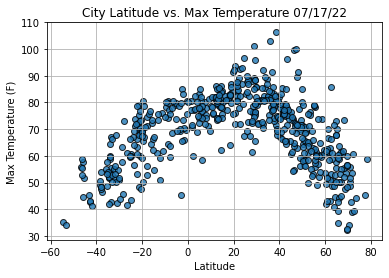

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

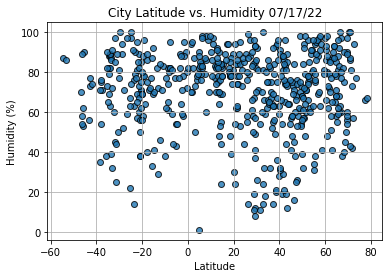

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

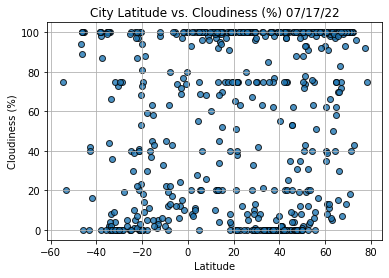

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

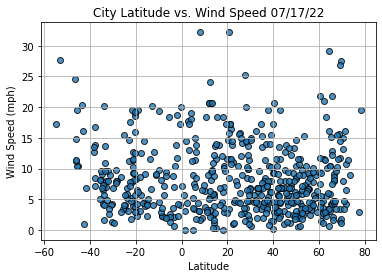

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()